# Test representation visualization

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

In [2]:
X_TEST_PATH = 'data/RoBERTa/generated_features/cdr3_test.parquet'
Y_TEST_PATH = 'data/targets_data/clusters/Galson_2016.parquet'
FULL_DATA_PATH = 'data/combined/clustered/final/Galson_2016.parquet'
REPRESENTATION_TYPE = 'RoBERTa CDR3'

In [3]:
# Parameters
X_TEST_PATH = "data/RoBERTa/generated_features/heavy_test.parquet"
REPRESENTATION_TYPE = "RoBERTa Heavy"


## Load data

In [4]:
import pandas as pd

features_data = pd.read_parquet(X_TEST_PATH)

features_data.info()
features_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682432 entries, 0 to 1682431
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 1.6 GB


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.792301,-0.888830,-0.064608,0.590399,1.567139,0.049261,-1.006275,-1.652548,0.237548,1.827275,...,-0.512984,-0.083556,0.687881,1.783285,-1.190336,1.987884,0.496515,-2.681381,-3.849975,-0.428320
1,0.463769,-0.266914,-0.811666,0.357449,1.096475,0.269872,-0.786178,-1.052726,-1.209654,0.575138,...,-1.061449,0.275126,1.483931,1.704980,-0.292179,1.803973,-0.867459,-1.086327,-3.539518,-0.297348
2,0.968568,-0.058461,-0.540775,-0.003231,0.403243,0.261081,-0.637388,-1.230400,-1.174958,0.171170,...,-1.207269,0.402087,0.918444,1.511251,-1.073415,2.172171,-0.483807,-1.117464,-3.403724,-0.550745
3,0.821479,-0.099261,-0.703563,0.035370,0.559267,0.209693,-0.333821,-0.628039,-1.364393,-0.032205,...,-0.677788,0.378528,0.985109,1.328567,-0.738591,2.037944,-0.596795,-1.156211,-3.176905,-0.523233
4,1.128847,-0.736639,-0.646106,0.354787,1.201389,0.256134,-0.719966,-1.549217,-0.727271,1.418313,...,-1.080829,-0.011273,0.831729,1.925782,-0.859609,2.154192,-0.069289,-1.396330,-3.610008,-0.476844


In [5]:
y_data = pd.read_parquet(Y_TEST_PATH)['HepB']

y_data.head()

Cluster_ID
0     True
1    False
2    False
3    False
4     True
Name: HepB, dtype: bool

In [6]:
pos_features_data = features_data[y_data]

pos_features_data.info()
pos_features_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229352 entries, 0 to 1682426
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 225.7 MB


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.792301,-0.888830,-0.064608,0.590399,1.567139,0.049261,-1.006275,-1.652548,0.237548,1.827275,...,-0.512984,-0.083556,0.687881,1.783285,-1.190336,1.987884,0.496515,-2.681381,-3.849975,-0.428320
4,1.128847,-0.736639,-0.646106,0.354787,1.201389,0.256134,-0.719966,-1.549217,-0.727271,1.418313,...,-1.080829,-0.011273,0.831729,1.925782,-0.859609,2.154192,-0.069289,-1.396330,-3.610008,-0.476844
5,0.764606,0.048219,-0.877449,0.015448,0.243958,0.364426,-0.199378,-0.776750,-1.544757,-0.157169,...,-1.162067,0.525670,0.827309,1.764362,-0.693044,2.245886,-0.569659,-1.057408,-3.182992,-0.746364
10,0.944036,-0.582614,-0.762842,0.419183,1.232353,0.553652,-0.421974,-1.315021,-0.900539,0.225485,...,-1.010952,0.193872,0.916086,1.757051,-0.409792,2.059882,-0.293044,-1.233027,-3.610685,-0.872260
14,1.006912,0.271332,-0.858803,-0.152279,0.514063,0.344769,-0.103069,-0.023589,-1.088529,-0.079343,...,-0.788485,0.333546,0.833818,1.813270,-0.256966,2.182580,-0.884429,-1.143413,-3.573451,-0.966488


In [7]:
clustered_data = pd.read_parquet(FULL_DATA_PATH)

clustered_data.info()
clustered_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10598377 entries, 0 to 67
Data columns (total 26 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Subject        object
 21  Species        object
 22  Vaccine        object
 23  Size           int64 
 24  cdr3_len       int64 
 25  Cluster_ID     int64 
dtypes: int64(6), object(20)
memory usage: 2.1+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Disease,Link,BSource,BType,Subject,Species,Vaccine,Size,cdr3_len,Cluster_ID
0,0,1,38802,SLRLSCAASGFTFSSYAMSWVRQAPGKGLEWVSVISGSGGSTYYAD...,IGHV3-23*01,AKDLAHYYDSSGYYYVLNNWFDP,106439,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2954,human,HepB,175096,23,33
1,0,1,95,SLRLSCAGSGFTFGSYAISWVRQVPGKGLEWVSSFAGRGSITYFAD...,IGHV3-23*01,ARVIERWPNCSGGNCYSGPWFDP,107933,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""G"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,34
2,0,1,428,SLRLSCAASGFTFSSFAMGWVRQAPGKGLEWVSSLSDGGGNRYYAD...,IGHV3-23*01,AKELGGGWFFGEVVSPRHNWFDP,122005,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,2
3,0,1,11277,SLRLSCAASGFTFSNYAMSWVRQAPGKGLEWVSTITDNGGSTYYAD...,IGHV3-23*01,AKDAHKPKTTYSGDQLLLGRFDP,117722,[None],IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,21
4,1,1,11579,SLRLSCAASGFTFSNYAMSWVRQAPGKGLEWVSTITDNGGSTYYAD...,IGHV3-23*01,AKDAHKPKTTYSGDQLLLGRFDP,130763,"[('94', 'R')]",IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://genomemedicine.biomedcentral.com/artic...,PBMC,Unsorted-B-Cells,Subject-2335,human,HepB,166649,23,21


## HepB sequences - t-SNE

In [8]:
from MulticoreTSNE import MulticoreTSNE as TSNE

TSNE_COMPONENTS = 2
RANDOM_STATE = 42
TSNE_PERPLEXITY = 300

# t-SNE
pos_tsne_output = TSNE(n_components=TSNE_COMPONENTS, perplexity=TSNE_PERPLEXITY, random_state=RANDOM_STATE, n_jobs=-1).fit_transform(pos_features_data)

In [9]:
import numpy as np

def tsne_data(tsne, X_data, y_data):
    cl_grouped = clustered_data[clustered_data['Cluster_ID'].isin(X_data.index)].groupby('Cluster_ID')
    source_subj_clusters = cl_grouped['Subject'].unique().value_counts()
    
    print(f'Single subject clusters: {", ".join(sorted(np.array([subjects for subjects in source_subj_clusters.index if len(subjects) == 1]).flatten()))}')
    
    cl_majority_subjects = cl_grouped['Subject'].agg(lambda x: x.mode()[0])
    cl_majority_subjects = cl_majority_subjects.loc[X_data.index]

    print(f'Majority subjects for clusters: {", ".join(sorted(cl_majority_subjects.unique()))}')
    
    cluster_sizes = cl_grouped.size()
    cluster_sizes = cluster_sizes.loc[X_data.index].rename('Size')
    
    # Dataframe containing all the information
    df = pd.DataFrame(tsne)
    df['Size'] = cluster_sizes.values
    df['Subject'] = cl_majority_subjects.values
    df['HepB'] = y_data.values

    return df

In [10]:
pos_df = tsne_data(pos_tsne_output, pos_features_data, y_data.loc[pos_features_data.index])
pos_df

Single subject clusters: Subject-2083, Subject-2125, Subject-2277, Subject-2335, Subject-2491, Subject-2492, Subject-2624, Subject-2752, Subject-2954


Majority subjects for clusters: Subject-2083, Subject-2125, Subject-2277, Subject-2335, Subject-2491, Subject-2492, Subject-2624, Subject-2752, Subject-2954


,0,1,Size,Subject,HepB
0,5.773052,-1.250903,160,Subject-2492,True
1,2.993180,-1.659861,15,Subject-2277,True
2,-9.308481,0.716213,10,Subject-2277,True
3,1.201190,-2.594277,4,Subject-2752,True
4,-3.968725,-3.891061,3,Subject-2954,True
...,...,...,...,...,...
229347,-0.594699,13.987827,8,Subject-2954,True
229348,-0.054202,14.174653,2,Subject-2492,True
229349,2.326040,14.253407,1,Subject-2954,True
229350,-4.279525,13.480187,1,Subject-2492,True


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

MARKER_SIZE_DIV = 10
DEFAULT_MARKER_SIZE = 5
ALPHA = 0.5
LARGEST_CLUSTERS_CNT = 5

unique_subjects = sorted(clustered_data['Subject'].unique(), reverse=True)
color_palette = itertools.cycle(sns.color_palette(n_colors=len(unique_subjects)))

# Plot attributes
subject_colors = {
    subject: color
    for subject, color in zip(unique_subjects, color_palette)
}
hepb_color_palette = itertools.cycle(sns.color_palette())
hepb_colors = {
    True: next(hepb_color_palette),
    False: next(hepb_color_palette)
}
hepb_labels = {
    True: 'HepB',
    False: 'Non-HepB'
}

def tsne_plot(tsne_df, hepb_grouping=False):
    _, ax = plt.subplots(figsize=(12,8))
    
    # Legend entry constructor
    legend_entry = lambda marker, color: plt.plot([],[], marker=marker, color=color, ls='None')[0]
    
    if hepb_grouping:
        tsne_df.plot.scatter(ax=ax, x=0, y=1,
                             color=tsne_df['HepB'].apply(lambda x: hepb_colors[x]).values,
                             s=(tsne_df['Size'] / MARKER_SIZE_DIV) + DEFAULT_MARKER_SIZE, 
                             linewidth=0, 
                             alpha=ALPHA)
        ax.set(title=f'{REPRESENTATION_TYPE} t-SNE')

        # Legend
        hepb_vals = sorted(hepb_colors.keys())
        handles = [legend_entry('o', hepb_colors[hepb]) for hepb in hepb_vals]
        labels = [hepb_labels[key] for key in hepb_vals]
    else:
        # Scatter plot
        tsne_df.plot.scatter(ax=ax, x=0, y=1,
                             color=tsne_df['Subject'].apply(lambda x: subject_colors[x]).values, 
                             s=(tsne_df['Size'] / MARKER_SIZE_DIV) + DEFAULT_MARKER_SIZE, 
                             linewidth=0, 
                             alpha=ALPHA)

        ax.set(title=f'{REPRESENTATION_TYPE} t-SNE of HepB sequences')

        # Legend
        subjects = sorted(list(tsne_df['Subject'].unique()))
        handles = [legend_entry('o', subject_colors[subj]) for subj in subjects]
        labels = subjects


    # Legend - marker size
    labels.append(f'Size = size/{MARKER_SIZE_DIV} + {DEFAULT_MARKER_SIZE}')
    handles.append(legend_entry(None, None))

    # Legend
    legend = plt.legend(handles, labels);
    for lh in legend.legendHandles:
        lh._size = [50]
        lh.set_alpha(1)

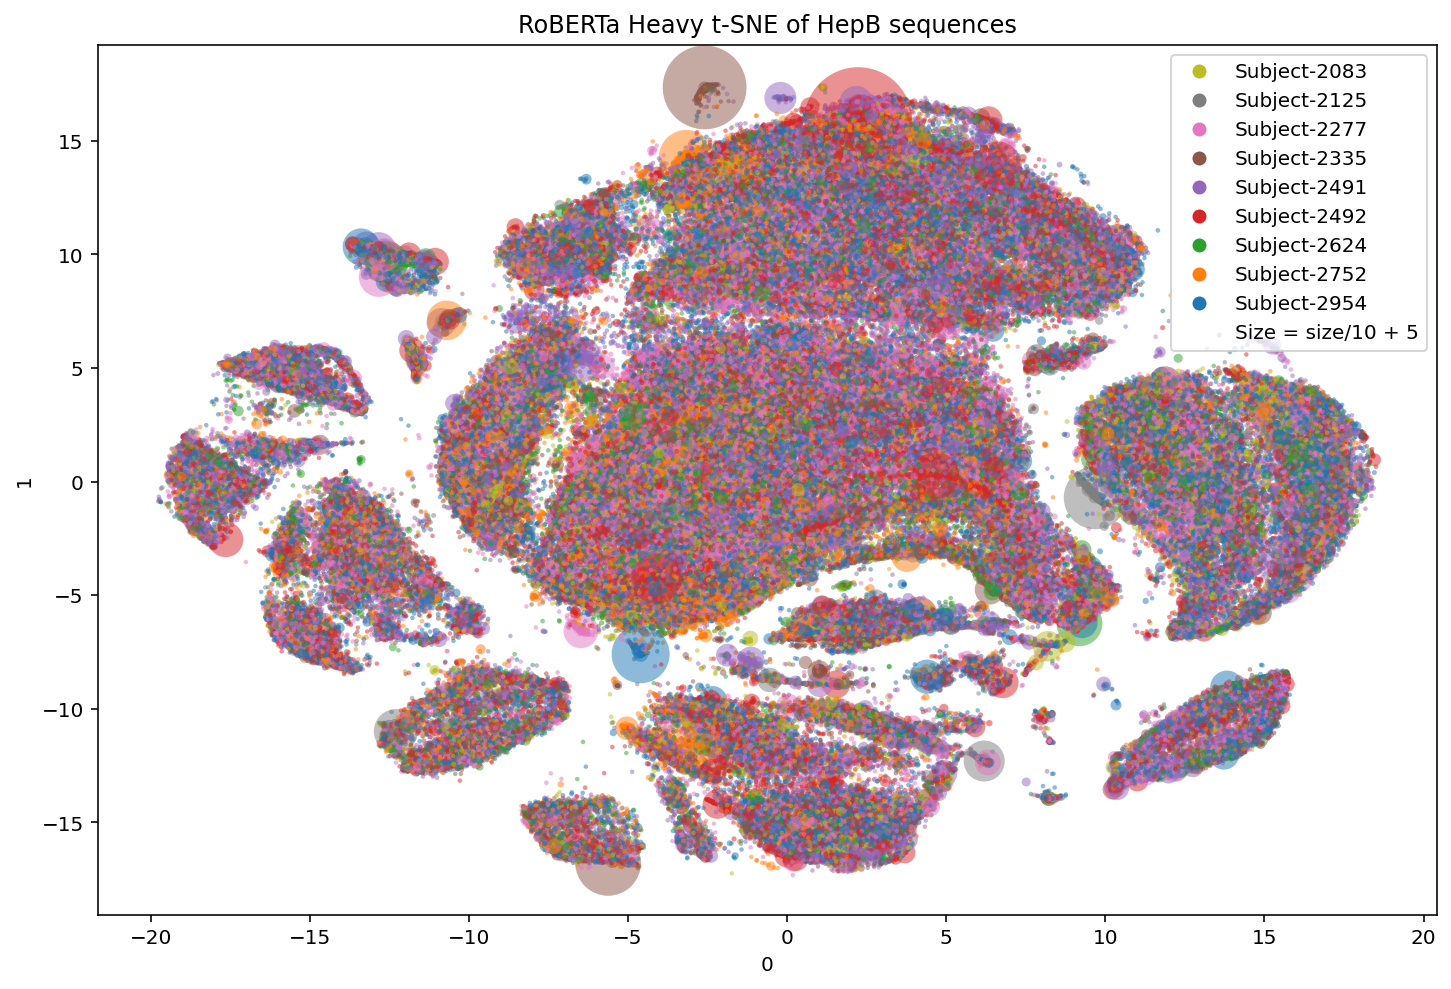

In [12]:
tsne_plot(pos_df)

## All sequences - t-SNE

In [ ]:
all_tsne_output = TSNE(n_components=TSNE_COMPONENTS, perplexity=TSNE_PERPLEXITY, random_state=RANDOM_STATE, n_jobs=-1).fit_transform(features_data)

In [ ]:
all_df = tsne_data(all_tsne_output, features_data, y_data)
all_df

In [ ]:
tsne_plot(all_df, hepb_grouping=True)